<a href="https://colab.research.google.com/github/bassem710/NLP-Task/blob/main/NLP_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


# Load dataset (top 10k words)
num_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Pad sequences to 500 tokens
maxlen = 500
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Build model
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=32, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    train_data, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

# Evaluate
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 74s 449ms/step - accuracy: 0.5963 - loss: 0.6614 - val_accuracy: 0.8386 - val_loss: 0.3869
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 344ms/step - accuracy: 0.8612 - loss: 0.3374 - val_accuracy: 0.8536 - val_loss: 0.3574
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 343ms/step - accuracy: 0.9146 - loss: 0.2245 - val_accuracy: 0.8636 - val_loss: 0.3291
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 345ms/step - accuracy: 0.9396 - loss: 0.1706 - val_accuracy: 0.8814 - val_loss: 0.3181
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 335ms/step - accuracy: 0.9487 - loss: 0.1529 - val_accuracy: 0.8782 - val_loss: 0.3275
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 348ms/step - accuracy: 0.9618 - loss: 0.1217 - val_accuracy: 0.8672 - val_loss: 0.3640
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 351ms/step - accuracy: 0.9698 - loss: 0.0939 - val_accuracy: 0.8626 - val_loss: 0.4308
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 359ms/step - accuracy: 0.9692 - loss: 0

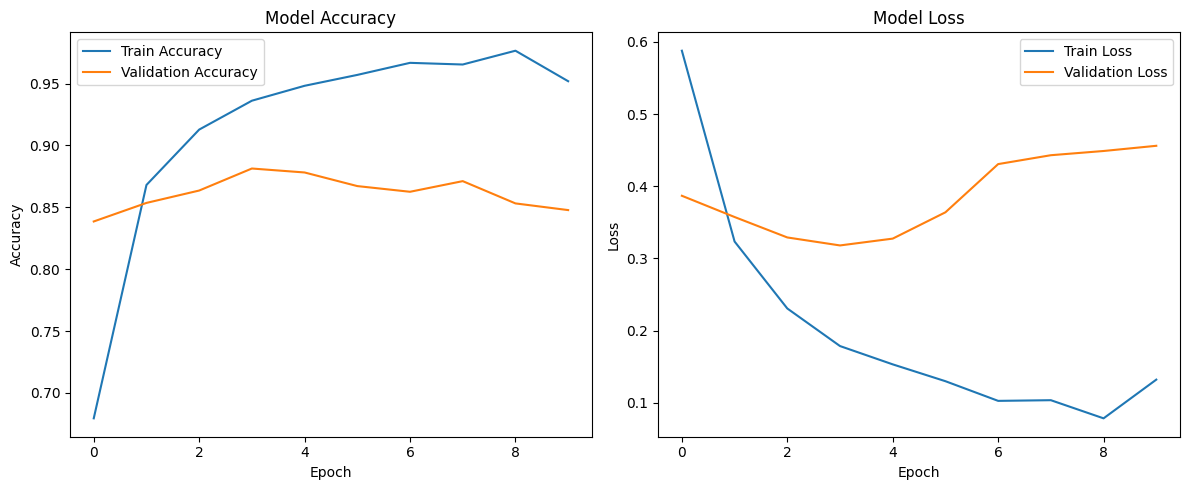

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()